# Diabetes Prediction Model

Import Dependies

In [ ]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Analysis

In [32]:
dataset.shape

(768, 9)

In [34]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
  dataset.describe()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
# Checking No of diabetic and Non-diabetic patients
print( dataset['Outcome'].value_counts() )

Outcome
0    500
1    268
Name: count, dtype: int64


0-> Nondiabetic 


1-> Diabetic

In [11]:
# Printing Mean of Outcome
dataset.groupby('Outcome').mean() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Separating Dataset and Label

In [36]:
diabetes_data = dataset.drop( columns = 'Outcome', axis = 1 )
target = dataset['Outcome' ]

In [37]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [38]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Data Visualization**

<Axes: xlabel='Outcome', ylabel='count'>

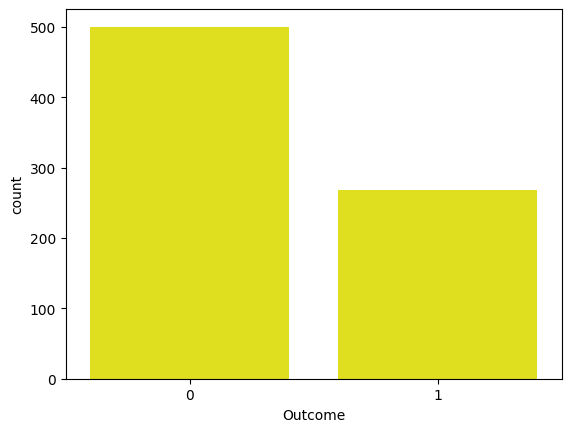

In [59]:
# Count Plot
sns.countplot(x = 'Outcome',data = dataset)

In [39]:
# Standardizing data
scaler = StandardScaler()
scaler.fit( diabetes_data )
diabetes_data.standardized = scaler.transform(diabetes_data)

C:\Users\Computer inn\AppData\Local\Temp\ipykernel_10348\1127123332.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  diabetes_data.standardized = scaler.transform(diabetes_data)


In [40]:
x = diabetes_data.standardized
y = dataset['Outcome']

Splitting Dataset into Training Data and Testing Data

In [41]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.02, stratify = y, random_state = 2 )

In [42]:
print( x.shape, x_train.shape, x_test.shape )

(768, 8) (752, 8) (16, 8)


Training the Model

In [43]:
classifier = svm.SVC(kernel = 'linear')

In [44]:
classifier.fit( x_train, y_train )

SVC(kernel='linear')

**Model Evaluation**

**Accuracy Score of Training Data**

In [47]:
x_train_prediction = classifier.predict( x_train )
training_accuracy_data = accuracy_score( x_train_prediction, y_train ) 

In [49]:
print( 'The Accuracy Score of trained data is: ', training_accuracy_data )

The Accuracy Score of trained data is:  0.7726063829787234


**Accuracy score of testing data**

In [51]:
x_test_prediction = classifier.predict( x_test )
test_accuracy_data = accuracy_score( x_test_prediction, y_test )

In [52]:
print( 'The Accuracy Score of test data is: ', test_accuracy_data )

The Accuracy Score of test data is:  0.875


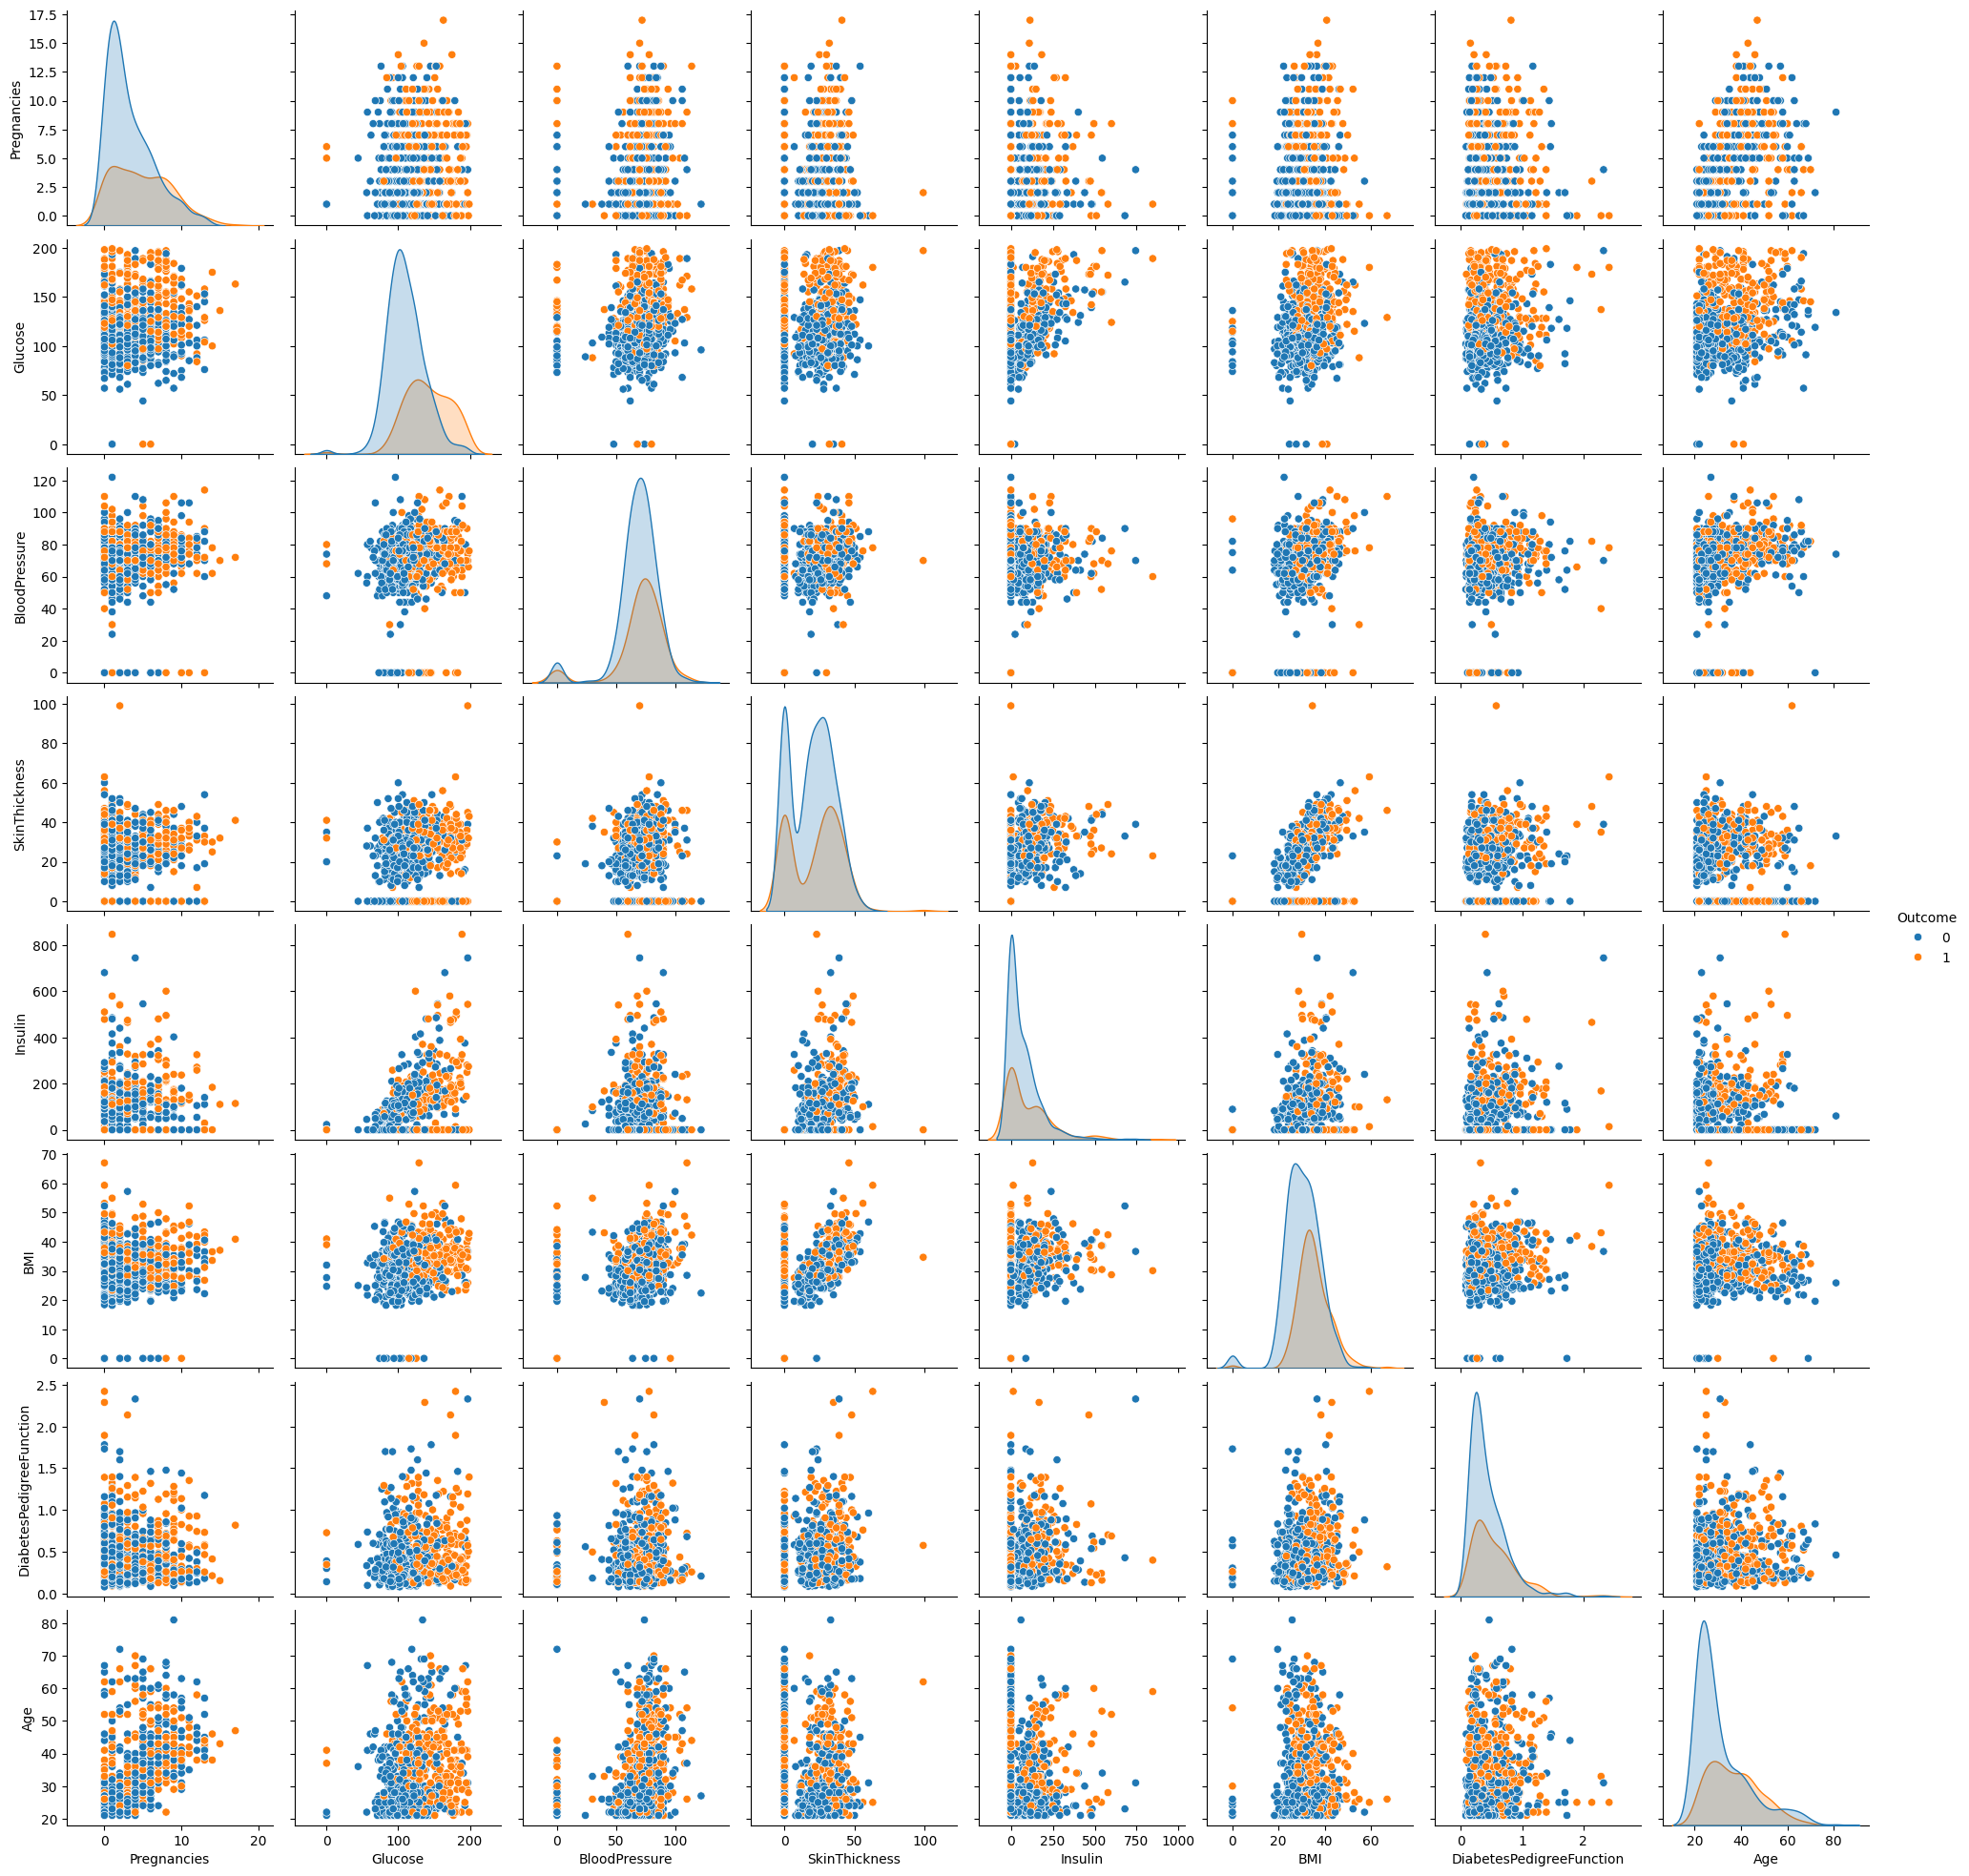

In [30]:
# Pairplot 
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()    # Pairplot 
